In [20]:
import os
import numpy as np
import random
import importlib

from sklearn.model_selection import train_test_split

import Models; importlib.reload(Models)
import utils; importlib.reload(utils)
print('Libraries Loaded')

Libraries Loaded


## Main

In [4]:
## Folders
root = r'C:\Users\saad\Desktop\Image-Background-Removal\COCO Dataset\COCOdataset2017'
annotations = r'annotations'
images = r'images'
pre_imgs = r'Preprocesed_images'

## Training
train_img = 'train'
train_ann = 'instances_train.json'
train_process = 'train_images'

## Validation
val_img = r'val'
val_ann = r'instances_val.json'
val_img_process = 'val_images'
val_ann_process = 'val_ann'


In [8]:
input_name,input_images = utils.read_imgs(os.path.join(root,pre_imgs,val_img_process))
print('Input images done')
output_name,output_images = utils.read_imgs(os.path.join(root,pre_imgs,val_ann_process))
print('Output images done')

Input images done
Output images done


In [9]:
output_images.shape

(2090, 480, 320, 3)

In [12]:
input_processed = input_images/255.
output_processed = output_images[:,:,:,1:2]/255.
output_processed[output_processed>=0.5] = 1
output_processed[output_processed<0.5] = 0
output_processed = output_processed.astype(np.int8)

print(f'The shape of the input_process is {input_processed.shape} and the shape of output_processed is {output_processed.shape}')

The shape of the input_process is (2090, 480, 320, 3) and the shape of output_processed is (2090, 480, 320, 1)


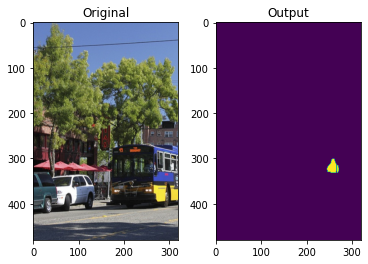

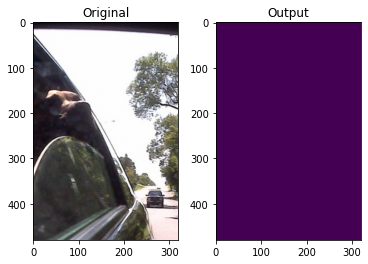

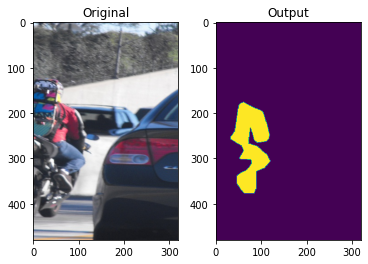

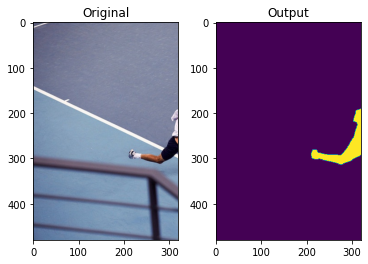

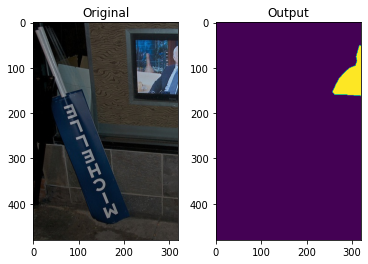

In [21]:
num = random.sample(range(0,len(input_processed)),5)
utils.visualize(input_processed,output_processed,num)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(input_processed,output_processed,test_size=0.2,random_state=42)

print(f'The shape of x_train is {x_train.shape} and the shape of y_train is {y_train.shape}')
print(f'The shape of x_test is {x_test.shape} and the shape of y_test is {y_test.shape}')

The shape of x_train is (1672, 480, 320, 3) and the shape of y_train is (1672, 480, 320, 1)
The shape of x_test is (418, 480, 320, 3) and the shape of y_test is (418, 480, 320, 1)


### Model

In [ ]:
filepath = 'unet_coco.hdf5'
checkpoint =keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True)

In [ ]:


model.summary()


# Start the training process
history = model.fit(x_train,y_train,validation_split=0.2,batch_size=1,epochs=200,callbacks=[checkpoint])

In [ ]:
model.load_weights(filepath)
predictions = model.predict(x_test)
predictions.shape

In [ ]:
p = np.copy(predictions)
p.shape

In [ ]:
p=np.expand_dims(np.argmax(predictions,axis=-1),axis=-1)

In [ ]:
visualize(y_test[:,:,:,:1],p,[0,1,2,3,4,5])

In [ ]:
x=np.copy(predictions[3])
x[x>=0.1]=1
x[x<0.1]=0
x.shape

In [ ]:
plt.imshow(x)

In [ ]:
plt.imshow(y_test[3,:,:,:1])

In [ ]:
b = np.dstack([x]*3)
b.shape

In [ ]:
foo=create_img(x_test[3],b,480,320)

In [ ]:
plt.imshow(foo)

In [ ]:
plt.imshow(x_test[3])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [ ]:
def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred) + 1.) / (K.sum(y_true) + K.sum(y_pred) + 1.)


def unet(num_classes, input_shape, lr_init, lr_decay, vgg_weight_path=None):
    img_input = Input(input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x)
    x = BatchNormalization()(x)
    block_1_out = Activation('relu')(x)

    x = MaxPooling2D()(block_1_out)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)
    x = BatchNormalization()(x)
    block_2_out = Activation('relu')(x)

    x = MaxPooling2D()(block_2_out)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x)
    x = BatchNormalization()(x)
    block_3_out = Activation('relu')(x)

    x = MaxPooling2D()(block_3_out)

    # Block 4
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x)
    x = BatchNormalization()(x)
    block_4_out = Activation('relu')(x)

    x = MaxPooling2D()(block_4_out)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same', name='block5_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block5_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block5_conv3')(x)
    x = BatchNormalization()(x)
    x = Activation('relu',name='before_VGG')(x)

    for_pretrained_weight = MaxPooling2D()(x)

    # Load pretrained weights.
    if vgg_weight_path is not None:
        print('VGG entered')
        vgg16 = Model(img_input, for_pretrained_weight)
        vgg16.load_weights(vgg_weight_path, by_name=True)

    # UP 1
    x = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_4_out])
    x = Conv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 2
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_3_out])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 3
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_2_out])
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 4
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_1_out])
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # last conv
    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(lr=lr_init, decay=lr_decay),
                  loss='mse',
                  metrics=[dice_coef,'accuracy'])
    return model

In [ ]:
# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()
model = unet(3,(224,224,3),1e-4,5e-4,'vgg_weights.h5')
model.summary()

In [ ]:
filepath1 = 'unet_coco1.hdf5'
checkpoint1 =keras.callbacks.ModelCheckpoint(filepath1, monitor='val_loss', verbose=0, save_best_only=True)
history1 = model.fit(x_train,y_train,validation_split=0.2,batch_size=16,epochs=5,callbacks=[checkpoint1])

In [ ]:
preds = model.predict(x_test)
preds.shape

In [ ]:
x = np.copy(preds[0])
# x[x>=0.5]=1
# x[x<0.5]=0
np.unique(x)

In [ ]:
plt.imshow(x)

In [ ]:
plt.imsho